In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('./dataset/TCurieData.csv', na_values=0)
df = df.rename(columns={'Composition': 'formula'})

In [2]:
df.head()

,formula,Annealing Time (s),Annealing Temperature (K),Thickness (mu m),Tc (K)
0,Fe69.5Co0.5Mn10Mo5B15,NaN,NaN,20.0,370.00000
1,Fe80Ni6Zr7Nb2B4Cu1,NaN,NaN,20.0,374.00000
2,Fe90Zr7B3,3600.0,873.25952,20.0,388.64693
3,Fe69.5Co0.5Mn10Mo5B15,1800.0,723.00000,20.0,389.00000
4,Fe90Zr7B3,3600.0,822.85321,20.0,389.68647


In [3]:
df.describe()

,Annealing Time (s),Annealing Temperature (K),Thickness (mu m),Tc (K)
count,98.000000,98.000000,220.000000,220.000000
mean,1668.527573,735.758597,21.677273,599.232518
std,1439.796336,74.034270,3.351607,73.767177
min,60.000000,573.000000,17.500000,370.000000
25%,240.000000,679.500000,20.000000,587.000000
50%,1800.000000,745.514655,20.000000,605.983795
75%,3600.000000,780.500000,22.500000,626.768258
max,3857.047930,924.632090,30.000000,769.000000


In [4]:
from matminer.featurizers.composition.element import ElementFraction
from matminer.featurizers.conversions import StrToComposition

df = StrToComposition().featurize_dataframe(df, "formula")
df.head()
ef = ElementFraction()
df = ef.featurize_dataframe(df, "composition")

/Users/jingsk/miniconda3/envs/matminer-phaseshift/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
ElementFraction: 100%|█████████████████████████████████████████████████████████████| 220/220 [00:00<00:00, 1301.30it/s]


In [5]:
from matminer.featurizers.composition import ElementProperty
magpie_properties = ElementProperty.from_preset(preset_name='magpie')
magpie_properties.featurize_dataframe(df, "composition")

ElementProperty: 100%|███████████████████████████████████████████████████████████████| 220/220 [00:19<00:00, 11.52it/s]


,formula,Annealing Time (s),Annealing Temperature (K),Thickness (mu m),Tc (K),composition,H,He,Li,Be,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,Fe69.5Co0.5Mn10Mo5B15,NaN,NaN,20.0,370.00000,"(Fe, Co, Mn, Mo, B)",0,0,0,0,...,2.110663,1.474684,0.884748,2.110663,166.0,229.0,63.0,218.175000,16.129250,229.0
1,Fe80Ni6Zr7Nb2B4Cu1,NaN,NaN,20.0,374.00000,"(Fe, Ni, Zr, Nb, B, Cu)",0,0,0,0,...,2.110663,1.724254,0.618254,2.110663,166.0,229.0,63.0,223.750000,8.785000,229.0
2,Fe90Zr7B3,3600.0,873.25952,20.0,388.64693,"(Fe, Zr, B)",0,0,0,0,...,2.110663,1.899597,0.379919,2.110663,166.0,229.0,63.0,224.660000,7.812000,229.0
3,Fe69.5Co0.5Mn10Mo5B15,1800.0,723.00000,20.0,389.00000,"(Fe, Co, Mn, Mo, B)",0,0,0,0,...,2.110663,1.474684,0.884748,2.110663,166.0,229.0,63.0,218.175000,16.129250,229.0
4,Fe90Zr7B3,3600.0,822.85321,20.0,389.68647,"(Fe, Zr, B)",0,0,0,0,...,2.110663,1.899597,0.379919,2.110663,166.0,229.0,63.0,224.660000,7.812000,229.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,Fe71Si5.4375B23.5625,NaN,NaN,30.0,736.00000,"(Fe, Si, B)",0,0,0,0,...,2.110663,1.498571,0.869171,2.110663,166.0,229.0,63.0,214.046875,22.642090,229.0
216,Fe75.9Ni1.33Si9.16B13Cu0.21Nb0.4,720.0,797.00000,20.0,742.00000,"(Fe, Ni, Si, B, Cu, Nb)",0,0,0,0,...,2.110663,1.609912,0.760140,2.110663,166.0,229.0,63.0,220.565200,14.186952,229.0
217,Fe58.5Co19.5Mo1B13P6Si2,NaN,NaN,17.5,750.00000,"(Fe, Co, Mo, B, P, Si)",0,0,0,0,...,2.110663,1.536690,0.676143,2.110663,2.0,229.0,227.0,200.325000,35.190250,229.0
218,Fe86B5C8P1,NaN,NaN,20.0,752.00000,"(Fe, B, C, P)",0,0,0,0,...,2.110663,1.815170,0.508248,2.110663,2.0,229.0,227.0,220.780000,14.138400,229.0


In [6]:
from sklearn.model_selection import train_test_split

X = df.drop(['Tc (K)', 
             'composition',
             'formula'], axis =1)
y = df['Tc (K)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rf = RandomForestRegressor(n_estimators=50, random_state=1)

rf.fit(X_train, y_train)
print(f'training R2 = {rf.score(X_train, y_train): .03f}')
print(f'training RMSE = {np.sqrt(mean_squared_error(y_true=y_train, y_pred=rf.predict(X_train))):.3f}')

training R2 =  0.965
training RMSE = 13.493


In [8]:
from sklearn.model_selection import KFold, cross_val_score
# compute cross validation scores for random forest model
crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)
r2_scores = cross_val_score(rf, X_train, y_train, scoring='r2', cv=crossvalidation, n_jobs=-1)
scores = cross_val_score(rf, X_train, y_train, scoring='neg_mean_squared_error', cv=crossvalidation, n_jobs=-1)
rmse_scores = [np.sqrt(abs(s)) for s in scores]

print('Cross-validation results:')
print('Folds: %i, mean R2: %.3f' % (len(scores), np.mean(np.abs(r2_scores))))
print('Folds: %i, mean RMSE: %.3f' % (len(scores), np.mean(np.abs(rmse_scores))))

Cross-validation results:
Folds: 5, mean R2: 0.641
Folds: 5, mean RMSE: 38.645


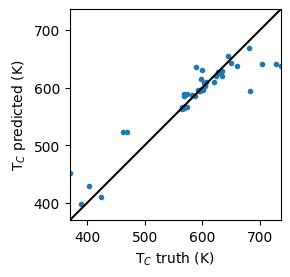

In [9]:
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

fig, ax = plt.subplots(figsize=[3,3])

y_predicted = rf.predict(X_test)
ax.plot(y_test, y_predicted, '.')
ymin, ymax = np.min([y_test, y_predicted]), np.max([y_test, y_predicted])
plt.xlim(ymin, ymax)
plt.ylim(ymin, ymax)
ax.axline((0, 0), slope=1, color='k')
loc = plticker.AutoLocator() # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
ax.yaxis.set_major_locator(loc)
ax.set_xlabel(r'T$_{C}$ truth (K)')
ax.set_ylabel(r'T$_{C}$ predicted (K)')
ax.set_aspect('equal', 'box')
fig.tight_layout()
fig.savefig('rf.png', dpi=300)

In [10]:
importances = rf.feature_importances_
# included = np.asarray(included)
included = X.columns.values
indices = np.argsort(importances)[::-1]

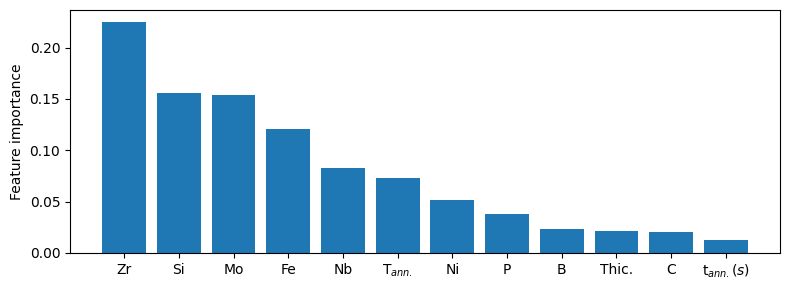

In [14]:
fig, ax = plt.subplots(figsize=[8,3])

features = included[indices][0:12]
scores = importances[indices][0:12]

features[features=='Annealing Temperature (K)'] = r'T$_{ann.}$'
features[features=='Thickness (mu m)'] = 'Thic.'
features[features=='Annealing Time (s)'] = r't$_{ann.} (s)$'

ax.bar(features, scores)
ax.set_ylabel('Feature importance')
fig.tight_layout()
fig.savefig('feat_weights.png', dpi=300)